## This notebook is purely Data Visualizations

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [54]:
df_reddit = pd.read_csv('Datasets/reddit_cleaned_title_and_selftext.csv')

In [55]:
df_reddit.head()

,author,id,num_comments,score,created_utc,selftext,title,subreddit,char_count_title,word_count_title,char_count_selftext,word_count_selftext,title + selftext,clean_title,clean_selftext,clean_title_+_selftext,neg,neu,pos,compound
0,nothanksbud5,g5rffm,1,2,1587516214,Wow i didn’t realize how much music is about b...,Why is almost all music seem to be about love?,0,46,10,219,36,Why is almost all music seem to be about love?...,almost music seem love,wow realize much music love romance seems like...,almost music seem love wow realize much music ...,0.080,0.301,0.619,0.9777
1,dontknowwhattdo,g5r7z2,3,2,1587515419,I thought that during this time it would be ni...,pieces of advice that have stuck with you?,0,42,8,285,55,pieces of advice that have stuck with you? I t...,pieces advice stuck,thought time would nice hear words encourageme...,pieces advice stuck thought time would nice he...,0.091,0.383,0.526,0.9657
2,sharkfinnsouphk,g5r5q2,2,0,1587515173,I just can't shake this worry about kids (and ...,Worried about people stuck at home,0,34,6,269,50,Worried about people stuck at home I just can'...,worried people stuck home,shake worry kids adults stuck home lock sexual...,worried people stuck home shake worry kids adu...,0.467,0.456,0.077,-0.8924
3,dehlen1me,g5r3t3,0,1,1587514972,https://youtu.be/9_AWrNmcMZA\nThis is one of t...,How a 5 Dollar bill can help you to feel bette...,0,62,13,179,24,How a 5 Dollar bill can help you to feel bette...,dollar bill help feel better,https youtu awrnmcmza one amazing uplifting vi...,dollar bill help feel better https youtu awrnm...,0.000,0.630,0.370,0.8555
4,fighterpilot909,g5qtjo,2,2,1587513886,Imagine how insane that book would be. To make...,I want an autobiography from John McAfee so badly,0,49,9,144,28,I want an autobiography from John McAfee so ba...,want autobiography john mcafee badly,imagine insane book would make even better cou...,want autobiography john mcafee badly imagine i...,0.215,0.630,0.156,-0.3818


In [56]:
df_reddit.groupby('subreddit')[['pos', 'neg', 'neu', 'compound']].mean()

,pos,neg,neu,compound
subreddit,,,,
0,0.228804,0.124600,0.646521,0.388224
1,0.207437,0.190475,0.602101,0.070587


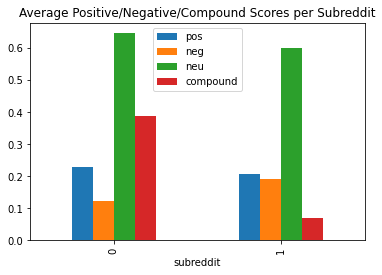

In [57]:
df_reddit.groupby('subreddit')[['pos', 'neg', 'neu', 'compound']].mean().plot(kind='bar')
plt.title('Average Positive/Negative/Compound Scores per Subreddit');

In [58]:
# This function is taken from the local lab sentiment analysis
def plot_dist(df = df_reddit, subreddits = [0, 1], col = 'neg'):
    for subs in subreddits:
        sns.distplot(df.loc[df['subreddit'] == subs][col], hist=False, label=subs)
    plt.legend()
    plt.title(f'Distribution for {col} subreddits by submission')
    return plt.show();

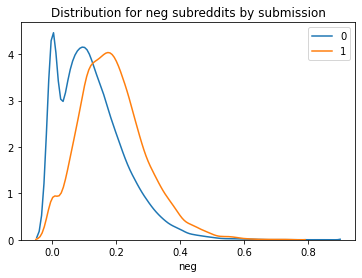

In [59]:
plot_dist()

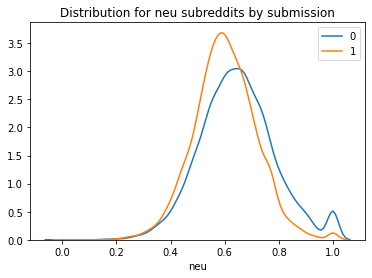

In [60]:
plot_dist(col='neu');

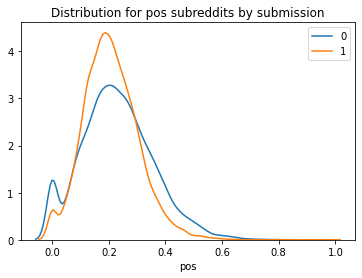

In [61]:
plot_dist(col='pos');

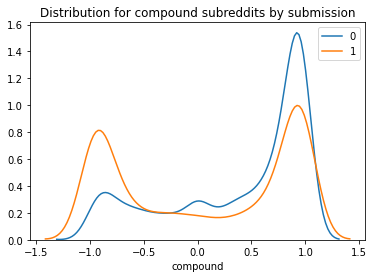

In [62]:
plot_dist(col='compound');

In [63]:
df_reddit.sort_values('num_comments', ascending=False)

,author,id,num_comments,score,created_utc,selftext,title,subreddit,char_count_title,word_count_title,char_count_selftext,word_count_selftext,title + selftext,clean_title,clean_selftext,clean_title_+_selftext,neg,neu,pos,compound
18893,ghost_sanctum,fle7gb,3001,1,1584639819,Just live streams of people at home getting in...,This coronavirus things has made me realize pe...,0,151,27,577,110,This coronavirus things has made me realize pe...,coronavirus things made realize people would l...,live streams people home getting touch instrum...,coronavirus things made realize people would l...,0.067,0.649,0.284,0.9433
17879,GosuPleb,fn2jyi,1814,1,1584895255,I'm about to graduate and get my first full ti...,I just ate rich people pasta for the first time,0,47,10,1014,192,I just ate rich people pasta for the first tim...,ate rich people pasta first time,graduate get first full time job couple months...,ate rich people pasta first time graduate get ...,0.125,0.769,0.105,-0.3400
20901,befuddledghostie,fi46zb,1654,1,1584123753,At first I was mad that I would still have to ...,I’m a lunch lady at an elementary school schoo...,0,148,26,700,141,I’m a lunch lady at an elementary school schoo...,lunch lady elementary school school cancelled ...,first mad would still work everyone else gets ...,lunch lady elementary school school cancelled ...,0.079,0.782,0.139,0.7579
1402,lucluc777,g2nwaw,1617,16653,1587071913,It's never happened before. She's huge on mann...,My wife of 24 years just farted in front of me...,0,71,16,687,136,My wife of 24 years just farted in front of me...,wife years farted front first time ever,never happened huge manners would never discus...,wife years farted front first time ever never ...,0.197,0.717,0.085,-0.6454
3439,CrumbBCrumb,fx14d6,1468,1,1586326690,I work in a pharmacy and got a call from a cus...,I saved a customer $468 today. I was excited. ...,0,96,19,1130,227,I saved a customer $468 today. I was excited. ...,saved customer today excited excited today,work pharmacy got call customer today asking m...,saved customer today excited excited today wor...,0.000,0.708,0.292,0.9858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13262,ABurner4Me,a60jdi,0,1,1544754706,I made an online friend a few months ago and I...,How do I fix my paranoia about this?,1,36,8,511,102,How do I fix my paranoia about this? I made an...,fix paranoia,made online friend months ago voice chat group...,fix paranoia made online friend months ago voi...,0.283,0.569,0.148,-0.8182
13261,white_girl_lover,a6323w,0,1,1544776460,"Sorry if this is the wrong place to post this,...","My first ""puppy love"" experience at 21",1,38,7,1824,350,"My first ""puppy love"" experience at 21 Sorry i...",first puppy love experience,sorry wrong place post little emotional right ...,first puppy love experience sorry wrong place ...,0.204,0.595,0.202,0.1607
13256,Socialist_Sarcasm,a69tny,0,1,1544828119,Not sure if this is the right place to post th...,Grandfather and independence,1,28,3,1599,322,Grandfather and independence Not sure if this ...,grandfather independence,sure right place post thought would try grandf...,grandfather independence sure right place post...,0.119,0.608,0.273,0.9771
13255,Y3sN0Mayb3,a6cpxw,0,1,1544852063,I just talked to my ex. After 2 and a half mon...,Why is it so hard to let go?,1,28,8,857,172,Why is it so hard to let go? I just talked to ...,hard let go,talked ex half months already completely moved...,hard let go talked ex half months already comp...,0.045,0.595,0.360,0.9801


In [64]:
df_reddit.iloc[18893]['title']

'This coronavirus things has made me realize people would be a lot happier and explore their passions and interests if they didn’t have to work so much.'

In [65]:
df_reddit.iloc[18893]['selftext']

'Just live streams of people at home getting in touch with their instruments again, walking their dogs.\n\nPeople actually seemed to be hanging out with each other, even if it’s just playing my heart will go on or blowing a spitfire ball from the balconies.\n\nI get some people are mad or concerned because of cut hours , or just plain laid off , but if they , and everyone , had the means to the basics of just surviving and being alive it makes me yearn for that society where everyone is happy.\n\nPre- coronavirus I realized a lot of us work out butts off for very little reward.'

In [66]:
df_reddit.iloc[17879]['title']

'I just ate rich people pasta for the first time'

In [67]:
df_reddit.iloc[17879]['selftext']

"I'm about to graduate and get my first full time job in a couple of months. Meanwhile, I'm still living the poor plebejian life.\n\nI always get the cheapest 39 cents no name pasta. However, due to all the panic buying, almost all pasta was sold out. Except for the expensive brand pasta, which usually costs 1.43€, but it was reduced to 77 cents for some reason. It's in a fancy carton package with a little see through window. The cheap pasta I get is just a plastic bag.\n\n&amp;#x200B;\n\nSo I got the expensive pasta, but I still bought the cheapest pasta sauce for 79 cents. I cooked the pasta 15 minutes ago. What the actual fuck. I cooked it, and it's still thin. But it's not hard. It's stretchy, but it doesn't rip. You don't have to drown it in sauce until it's edible, no, it tastes good even without the sauce. I mixed it with the sauce. What is this. I didn't know pasta could have physical property like that. I can't go back to 39 cents pasta.\n\nNow imagine you're rich and this x10

In [68]:
more_than_100_comments = df_reddit.loc[df_reddit['num_comments'] >= 100, 
                                                ['num_comments', 'selftext', 'title', 'subreddit']]

In [69]:
more_than_100_comments['subreddit'].value_counts(normalize=True)

0    0.762712
1    0.237288
Name: subreddit, dtype: float64

In [70]:
more_than_100_comments['subreddit'].value_counts(normalize=False)

0    135
1     42
Name: subreddit, dtype: int64

In [71]:
more_than_250_comments = df_reddit.loc[df_reddit['num_comments'] >= 250, 
                                                ['num_comments', 'selftext', 'title', 'subreddit']]


In [72]:
more_than_250_comments['subreddit'].value_counts()

0    61
1     1
Name: subreddit, dtype: int64

In [73]:
more_than_100_comments_less_250 = df_reddit.loc[(df_reddit['num_comments'] <= 250) & 
                                                (df_reddit['num_comments'] >= 100), 
                                                ['num_comments', 'selftext', 'title', 'subreddit']]

In [74]:
more_than_100_comments_less_250['subreddit'].value_counts()

0    75
1    41
Name: subreddit, dtype: int64

In [75]:
df_reddit.loc[(df_reddit['num_comments'] >= 200) & (df_reddit['subreddit'] >= 1), :]

,author,id,num_comments,score,created_utc,selftext,title,subreddit,char_count_title,word_count_title,char_count_selftext,word_count_selftext,title + selftext,clean_title,clean_selftext,clean_title_+_selftext,neg,neu,pos,compound
8741,franklin2014ish,dw7czo,216,1,1573725145,Most controversial videos you see are vegan ac...,I really wish vegan activists would mind their...,1,71,13,719,131,I really wish vegan activists would mind their...,really wish vegan activists would mind busines...,controversial videos see vegan activists enter...,really wish vegan activists would mind busines...,0.321,0.556,0.123,-0.9559
11664,SadButterscotch2,bgnzbu,206,221,1556066044,"If we're divided, it will tear the country apa...","As a liberal person, the very thing I'm agains...",1,221,36,621,108,"As a liberal person, the very thing I'm agains...",liberal person thing blind hate lately blindly...,divided tear country apart lot division lately...,liberal person thing blind hate lately blindly...,0.384,0.446,0.170,-0.9707
12242,physioworld,b39ysm,215,52,1553074641,I really wish I could say that I believe in a ...,I really wish abortion were more black and white,1,48,9,1606,300,I really wish abortion were more black and whi...,really wish abortion black white,really wish could say believe woman right choo...,really wish abortion black white really wish c...,0.197,0.580,0.222,-0.4587
12562,Yuli-Ban,awnl54,514,799,1551567915,*The Day After* and *Threads* suitably shocked...,I feel we need new nuclear war-based films (Al...,1,106,17,3065,501,I feel we need new nuclear war-based films (Al...,feel need new nuclear war based films also nee...,day threads suitably shocked generation respec...,feel need new nuclear war based films also nee...,0.263,0.565,0.172,-0.9905


In [76]:
df_reddit.iloc[12562]['title']

'I feel we need new nuclear war-based films (Also, we need soberingly realistic films about climate change)'